# Wrestler Dataset 2

In [75]:
import pandas as pd
# Sample data for WWE wrestlers
data = {
    'Name': [
        'John Cena', 'The Rock', 'Stone Cold', 'Triple H', 'Undertaker',
        'Shawn Michaels', 'Brock Lesnar', 'Kurt Angle', 'Randy Orton', 'Edge',
        'AJ Styles', 'Daniel Bryan', 'Seth Rollins', 'Roman Reigns', 'Becky Lynch',
        'Finn Balor', 'Kevin Owens', 'Sami Zayn', 'Charlotte Flair', 'Sasha Banks',
        'Bayley', 'Drew McIntyre', 'Sheamus', 'Jeff Hardy', 'Matt Hardy'
    ],
    'Wins': [
        25, 30, 20, 15, 10, 12, 18, 22, 20, 16,
        14, 19, 21, 23, 27, 24, 16, 15, 18, 22,
        20, 17, 19, 21, 22
    ],
    'Losses': [
        10, 5, 15, 20, 25, 18, 10, 8, 12, 14,
        9, 11, 13, 7, 6, 9, 12, 14, 10, 8,
        11, 13, 15, 14, 9
    ],
    'Height (inches)': [
        75, 76, 74, 76, 80, 71, 76, 72, 75, 74,
        70, 69, 72, 75, 68, 70, 72, 71, 67, 68,
        74, 76, 72, 73, 75
    ],
    'Weight (lbs)': [
        251, 275, 252, 255, 299, 225, 286, 220, 245, 241,
        218, 210, 217, 265, 132, 190, 265, 210, 145, 134,
        260, 240, 280, 230, 215
    ]
}
# Create DataFrame
wrestlers_df = pd.DataFrame(data)
print("Initial DataFrame:")
print(wrestlers_df)

Initial DataFrame:
               Name  Wins  Losses  Height (inches)  Weight (lbs)
0         John Cena    25      10               75           251
1          The Rock    30       5               76           275
2        Stone Cold    20      15               74           252
3          Triple H    15      20               76           255
4        Undertaker    10      25               80           299
5    Shawn Michaels    12      18               71           225
6      Brock Lesnar    18      10               76           286
7        Kurt Angle    22       8               72           220
8       Randy Orton    20      12               75           245
9              Edge    16      14               74           241
10        AJ Styles    14       9               70           218
11     Daniel Bryan    19      11               69           210
12     Seth Rollins    21      13               72           217
13     Roman Reigns    23       7               75           265
14    

In [76]:
# Introduce null values
wrestlers_df.loc[5, 'Wins'] = None  # Set 'Wins' for Shawn Michaels to None
wrestlers_df.loc[10, 'Losses'] = None  # Set 'Losses' for AJ Styles to None
wrestlers_df.loc[15, 'Height (inches)'] = None  # Set 'Height' for Finn Balor to None

# Introduce outliers
wrestlers_df.loc[14, 'Wins'] = 100  # Outlier for Becky Lynch
wrestlers_df.loc[7, 'Weight (lbs)'] = 600  # Outlier for Kurt Angle

print("\nUpdated DataFrame with Nulls and Outliers:")
print(wrestlers_df.head())


Updated DataFrame with Nulls and Outliers:
         Name  Wins  Losses  Height (inches)  Weight (lbs)
0   John Cena  25.0    10.0             75.0           251
1    The Rock  30.0     5.0             76.0           275
2  Stone Cold  20.0    15.0             74.0           252
3    Triple H  15.0    20.0             76.0           255
4  Undertaker  10.0    25.0             80.0           299


### Getting the feel for the data

In [77]:
wrestlers_df.head()

,Name,Wins,Losses,Height (inches),Weight (lbs)
0,John Cena,25.0,10.0,75.0,251
1,The Rock,30.0,5.0,76.0,275
2,Stone Cold,20.0,15.0,74.0,252
3,Triple H,15.0,20.0,76.0,255
4,Undertaker,10.0,25.0,80.0,299


Let us remeber the units and update the column names

In [78]:
wrestlers_df=wrestlers_df.rename(columns={'Height (inches)':'Height','Weight (lbs)':'Weight'})

In [79]:
wrestlers_df.describe()

,Wins,Losses,Height,Weight
count,24.000000,24.000000,24.000000,25.000000
mean,22.791667,12.041667,72.958333,245.600000
std,16.957695,4.544267,3.141298,86.021315
min,10.000000,5.000000,67.000000,132.000000
25%,16.750000,9.000000,71.000000,215.000000
50%,20.000000,11.500000,73.500000,241.000000
75%,22.000000,14.000000,75.000000,265.000000
max,100.000000,25.000000,80.000000,600.000000


## Looking for Nulls

In [80]:
wrestlers_df.isna().sum()

Name      0
Wins      1
Losses    1
Height    1
Weight    0
dtype: int64

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

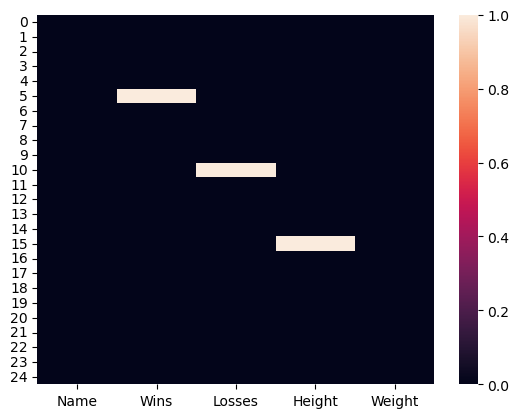

In [82]:
sns.heatmap(wrestlers_df.isna())

## Looking for Outliers

In [83]:
wrestlers_df.columns

Index(['Name', 'Wins', 'Losses', 'Height', 'Weight'], dtype='object')

In [84]:
wrestlers_df.dtypes

Name       object
Wins      float64
Losses    float64
Height    float64
Weight      int64
dtype: object

Using boxplot to look for outliers

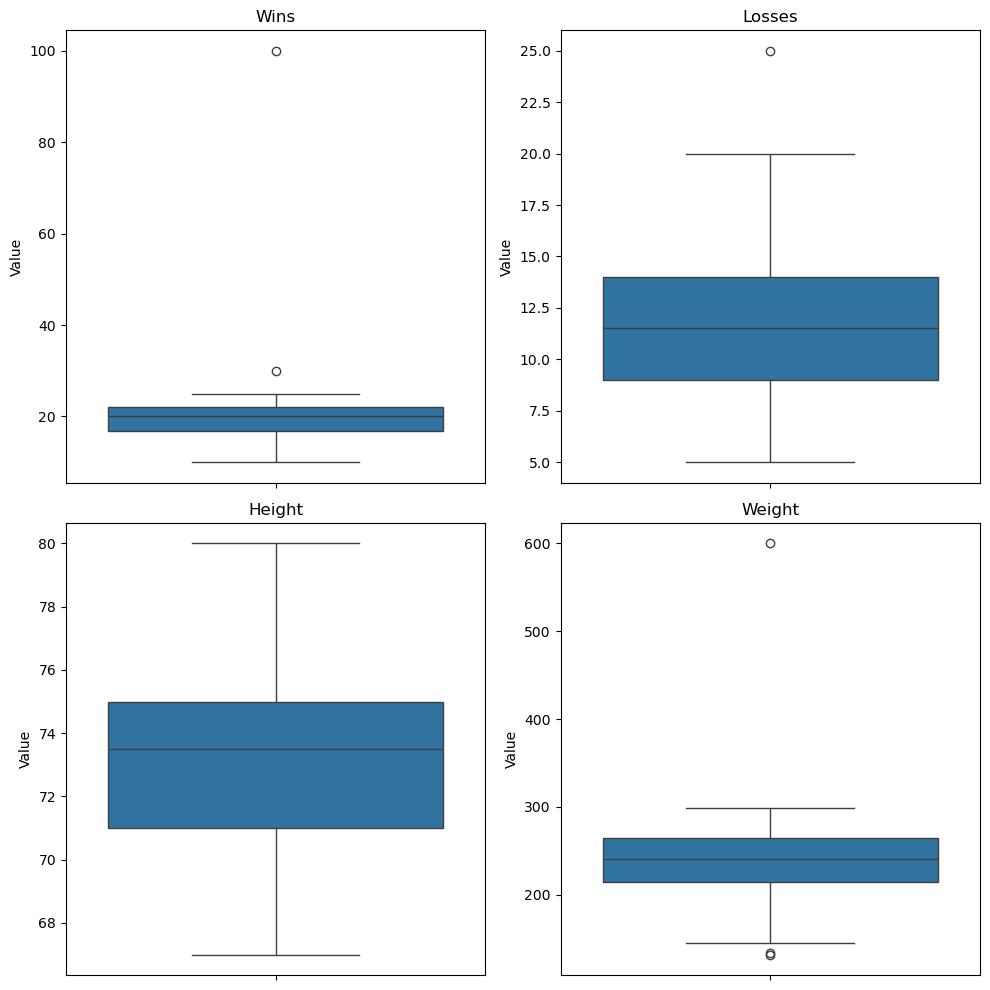

In [85]:
numerics = ['Wins', 'Losses', 'Height', 'Weight']
plt.figure(figsize=(10, 10))

for i, feature in enumerate(numerics):
    plt.subplot(2, 2, i + 1)
    plt.title(feature)
    plt.ylabel("Value")
    sns.boxplot(wrestlers_df[feature].dropna())

plt.tight_layout()  
plt.show()

It seems height is the only feature with no outliers.
But then again there seem to be extremely distant outlier and some with a decent acceptable value

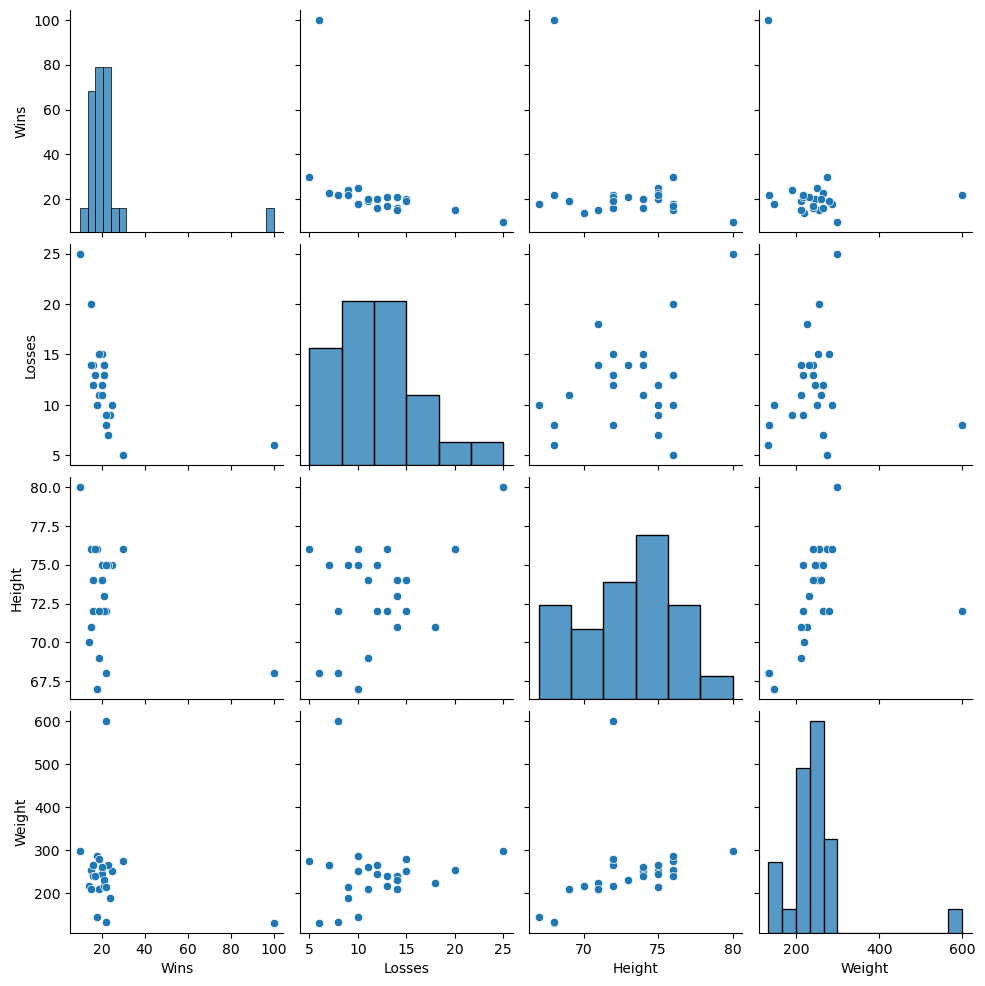

In [87]:
sns.pairplot(data=wrestlers_df)

The Histograms for weight and wins clearly shows the outlier values.
However, these may be a possibile values in WWE.

On cross checking, modern heavy weight wrestler can peak with a weight of 550lbs confirming that 600 lbs can be an outlier.

Let us take a proper look at the wins histogram

<Axes: xlabel='Wins', ylabel='Count'>

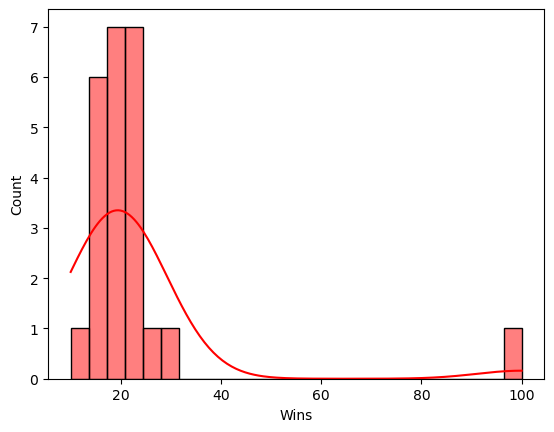

In [15]:
sns.histplot(wrestlers_df['Wins'],kde=1,color='red')

(array([ 4., 12.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 10.,  16.,  22.,  28.,  34.,  40.,  46.,  52.,  58.,  64.,  70.,
         76.,  82.,  88.,  94., 100.]),
 <BarContainer object of 15 artists>)

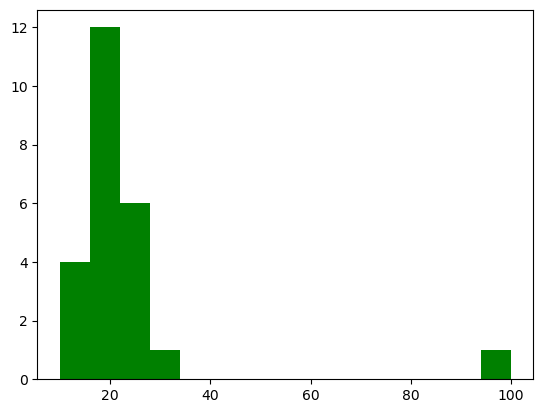

In [16]:
plt.hist(wrestlers_df['Wins'],bins=15,color='green')

## Data Wrangling

In [90]:
wrestlers_df['Wins'].quantile([0,0.25,0.5,0.8])
min_win_threshold=wrestlers_df['Wins'].quantile(0)
max_win_threshold=wrestlers_df['Wins'].quantile(0.8)

In [91]:
wrestlers_df=wrestlers_df[(wrestlers_df['Wins']>=min_win_threshold) & (wrestlers_df['Wins']<max_win_threshold)]
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,19.0,18.157895,3.219095,10.0,16.00,19.0,20.5,22.0
Losses,18.0,13.000000,4.186814,8.0,10.25,12.5,14.0,25.0
Height,19.0,72.947368,3.170589,67.0,71.50,73.0,75.0,80.0
Weight,19.0,252.736842,93.966213,134.0,216.00,241.0,262.5,600.0


In [92]:
wrestlers_df['Losses'].quantile([0,0.25,0.5,0.95])
min_loss_threshold=wrestlers_df['Losses'].quantile(0)
max_loss_threshold=wrestlers_df['Losses'].quantile(0.95)
wrestlers_df=wrestlers_df[(wrestlers_df['Losses']>=min_loss_threshold) & (wrestlers_df['Losses']<max_loss_threshold)]
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,17.0,18.882353,2.420804,15.0,17.0,19.0,21.0,22.0
Losses,17.0,12.294118,3.015889,8.0,10.0,12.0,14.0,20.0
Height,17.0,72.705882,2.756009,67.0,72.0,73.0,75.0,76.0
Weight,17.0,252.058824,98.608741,134.0,215.0,241.0,260.0,600.0


In [102]:
wrestlers_df

,Name,Wins,Losses,Height,Weight
2,Stone Cold,20.0,15.0,74.0,252
3,Triple H,15.0,20.0,76.0,255
6,Brock Lesnar,18.0,10.0,76.0,286
7,Kurt Angle,22.0,8.0,72.0,600
8,Randy Orton,20.0,12.0,75.0,245
9,Edge,16.0,14.0,74.0,241
11,Daniel Bryan,19.0,11.0,69.0,210
12,Seth Rollins,21.0,13.0,72.0,217
16,Kevin Owens,16.0,12.0,72.0,265
17,Sami Zayn,15.0,14.0,71.0,210


<Axes: >

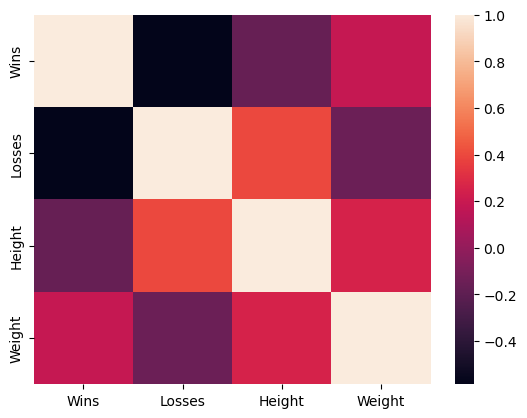

In [104]:
sns.heatmap(wrestlers_df.corr(numeric_only=True))

In [106]:
wrestlers_df.corr(numeric_only=True)

,Wins,Losses,Height,Weight
Wins,1.000000,-0.585647,-0.164764,0.186709
Losses,-0.585647,1.000000,0.394548,-0.150956
Height,-0.164764,0.394548,1.000000,0.256262
Weight,0.186709,-0.150956,0.256262,1.000000


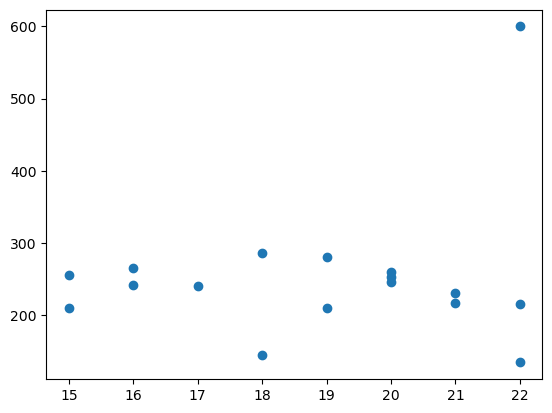

In [112]:
plt.scatter(x=wrestlers_df['Wins'],y=wrestlers_df['Weight'])

In [110]:
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,17.0,18.882353,2.420804,15.0,17.0,19.0,21.0,22.0
Losses,17.0,12.294118,3.015889,8.0,10.0,12.0,14.0,20.0
Height,17.0,72.705882,2.756009,67.0,72.0,73.0,75.0,76.0
Weight,17.0,252.058824,98.608741,134.0,215.0,241.0,260.0,600.0
